## Business Intelligence Project 
Student:Alsiraira Moktar ,
Email:h22alsmo@du.se
    

## Loading the needed libraires 

In [1]:
#Importing the needed libraires
# Importing the pandas library for data manipulation and analysis
import pandas as pd  
 # Importing the seaborn library for data visualization
import seaborn as sns 
 # Importing the pyplot module from matplotlib for additional plotting capabilities
import matplotlib.pyplot as plt 
# Importing the datetime module for working with date and time data
import datetime as dt
# Importing StandardScaler from scikit-learn for data standardization
from sklearn.preprocessing import StandardScaler 
# Importing PCA (Principal Component Analysis) from scikit-learn for dimensionality reduction
from sklearn.decomposition import PCA  
 # Importing KMeans from scikit-learn for performing K-means clustering
from sklearn.cluster import KMeans
# Importing the NumPy library for numerical computations in Python
import numpy as np


## Reading the dataset

In [2]:
# loading the data 
Marketing_df = pd.read_csv('C:/Users/Admin/Desktop/project BI/Data/marketing_campaign.csv',header=0,sep='\t')
# display the first 5 rows of the data
Marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Start the explortary data analysis (EDA)

In [3]:
# Displaying information about the DataFrame Marketing_df
Marketing_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# from the info above , we notice that we have three variables that are coded as object 
# and the income variable have a mising values , were it have 2216 observations instead of 2240

In [5]:
# Fill the missing values of the Income column with the median value
median_income = Marketing_df['Income'].median()
Marketing_df['Income'] = Marketing_df['Income'].fillna(median_income)

In [6]:
# Displaying information about the DataFrame Marketing_df after filling the missing values
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
Marketing_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [8]:
# create a dictionary to map the old values to the new values
education_dict = {'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate', 'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'}

# use the map() method to replace the old values with the new values
Marketing_df['Education'] = Marketing_df['Education'].map(education_dict)
Marketing_df['Education'] 

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education, Length: 2240, dtype: object

In [9]:

Marketing_df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [10]:
# Replace values of 'Marital_Status'
Marketing_df['Marital_Status'] = Marketing_df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
Marketing_df['Marital_Status'] = Marketing_df['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Alone')
Marketing_df['Marital_Status']

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Marital_Status, Length: 2240, dtype: object

In [11]:
Marketing_df['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64

In [84]:
Marketing_df['Dt_Customer'] = pd.to_datetime(Marketing_df['Dt_Customer'])


In [85]:
Marketing_df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2229, dtype: datetime64[ns]

In [13]:
Marketing_df['Dt_Customer'] = pd.to_datetime(Marketing_df['Dt_Customer'])
Marketing_df['Education'] = Marketing_df['Education'].astype('category')
Marketing_df['Marital_Status'] = Marketing_df['Marital_Status'].astype('category')
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [14]:
# Find latest date in 'Dt_Customer' column
latest_date = Marketing_df['Dt_Customer'].max()

print(latest_date)

2014-12-06 00:00:00


In [15]:
# Calculate age of each customer using the Year_Birth column
Marketing_df['age'] = 2014 - Marketing_df['Year_Birth']

# Check for outliers in age and Income columns
Q1 = Marketing_df[['age', 'Income']].quantile(0.25)
Q3 = Marketing_df[['age', 'Income']].quantile(0.75)
IQR = Q3 - Q1

outliers_age = ((Marketing_df['age'] < (Q1['age'] - 1.5 * IQR['age'])) | (Marketing_df['age'] > (Q3['age'] + 1.5 * IQR['age'])))
outliers_income = ((Marketing_df['Income'] < (Q1['Income'] - 1.5 * IQR['Income'])) | (Marketing_df['Income'] > (Q3['Income'] + 1.5 * IQR['Income'])))

print("Number of outliers in age column:", outliers_age.sum())
print("Number of outliers in Income column:", outliers_income.sum())


Number of outliers in age column: 3
Number of outliers in Income column: 8


In [16]:
# Remove outliers from age and Income columns
Marketing_df = Marketing_df.loc[~outliers_age, :]
Marketing_df = Marketing_df.loc[~outliers_income, :]

In [17]:
Marketing_df 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,47
2236,4001,1946,Postgraduate,Partner,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,68
2237,7270,1981,Graduate,Alone,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,33
2238,8235,1956,Postgraduate,Partner,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,58


## Feature Engineering 
New features were created based on the existing features to enhance the dataset's representation and capture additional information. This step aimed to improve the clustering performance

In [18]:
# Calculate number of months since customer enrollment using the Dt_Customer column
max_date = Marketing_df['Dt_Customer'].max()
Marketing_df['months_since_enrollment'] = ((max_date - Marketing_df['Dt_Customer']).dt.days / 30.44)

# Check the new variable
print(Marketing_df['months_since_enrollment'].describe())

count    2229.000000
mean       16.823231
std         7.631008
min         0.000000
25%        11.202365
50%        16.852825
75%        22.536137
max        34.921156
Name: months_since_enrollment, dtype: float64


In [19]:
# Round the months_since_enrollment column
Marketing_df['months_since_enrollment'] = Marketing_df['months_since_enrollment'].round()

# Check the new variable
print(Marketing_df['months_since_enrollment'].describe())

count    2229.000000
mean       16.825931
std         7.673735
min         0.000000
25%        11.000000
50%        17.000000
75%        23.000000
max        35.000000
Name: months_since_enrollment, dtype: float64


In [20]:
Marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,months_since_enrollment
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,57,32.0
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,60,4.0
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,49,16.0
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,30,2.0
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,33,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,47,18.0
2236,4001,1946,Postgraduate,Partner,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,68,2.0
2237,7270,1981,Graduate,Alone,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,33,10.0
2238,8235,1956,Postgraduate,Partner,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,58,10.0


In [21]:
Marketing_df['num_children'] = Marketing_df['Kidhome'] + Marketing_df['Teenhome']
Marketing_df['num_children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: num_children, Length: 2229, dtype: int64

In [22]:
Marketing_df['spending'] = Marketing_df['MntWines'] + Marketing_df['MntFruits'] + \
                            Marketing_df['MntMeatProducts'] + Marketing_df['MntFishProducts'] + \
                            Marketing_df['MntSweetProducts'] + Marketing_df['MntGoldProds']
Marketing_df['spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: spending, Length: 2229, dtype: int64

In [23]:
# Define is_parent column based on the values in 'children' column
Marketing_df['is_parent'] = (Marketing_df['Kidhome'] + Marketing_df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)

# Check the new variable
print(Marketing_df['is_parent'].value_counts())


1    1596
0     633
Name: is_parent, dtype: int64


In [24]:
Marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,months_since_enrollment,num_children,spending,is_parent
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,57,32.0,0,1617,0
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,60,4.0,2,27,1
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,49,16.0,0,776,0
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,30,2.0,1,53,1
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,33,11.0,1,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,47,18.0,1,1341,1
2236,4001,1946,Postgraduate,Partner,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,68,2.0,3,444,1
2237,7270,1981,Graduate,Alone,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,33,10.0,0,1241,0
2238,8235,1956,Postgraduate,Partner,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,58,10.0,1,843,1


In [25]:
print(Marketing_df['Z_CostContact'].value_counts())

3    2229
Name: Z_CostContact, dtype: int64


In [27]:
#For clarity I will rename the variables
Marketing_df=Marketing_df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
Marketing_df.head(12)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,months_since_enrollment,num_children,spending,is_parent
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,57,32.0,0,1617,0
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,60,4.0,2,27,1
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,49,16.0,0,776,0
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,30,2.0,1,53,1
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,33,11.0,1,422,1
5,7446,1967,Postgraduate,Partner,62513.0,0,1,2013-09-09,16,520,...,0,0,3,11,0,47,15.0,1,716,1
6,965,1971,Graduate,Alone,55635.0,0,1,2012-11-13,34,235,...,0,0,3,11,0,43,25.0,1,590,1
7,6177,1985,Postgraduate,Partner,33454.0,1,0,2013-08-05,32,76,...,0,0,3,11,0,29,16.0,1,169,1
8,4855,1974,Postgraduate,Partner,30351.0,1,0,2013-06-06,19,14,...,0,0,3,11,1,40,18.0,1,46,1
9,5899,1950,Postgraduate,Partner,5648.0,1,1,2014-03-13,68,28,...,0,0,3,11,0,64,9.0,2,49,1


In [28]:
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2229 non-null   int64         
 1   Year_Birth               2229 non-null   int64         
 2   Education                2229 non-null   category      
 3   Marital_Status           2229 non-null   category      
 4   Income                   2229 non-null   float64       
 5   Kidhome                  2229 non-null   int64         
 6   Teenhome                 2229 non-null   int64         
 7   Dt_Customer              2229 non-null   datetime64[ns]
 8   Recency                  2229 non-null   int64         
 9   Wines                    2229 non-null   int64         
 10  Fruits                   2229 non-null   int64         
 11  Meat                     2229 non-null   int64         
 12  Fish                     2229 non-

## plotiong the variables to get a sence of the data

C:\Users\Admin\AppData\Local\Temp\ipykernel_7636\3317741549.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

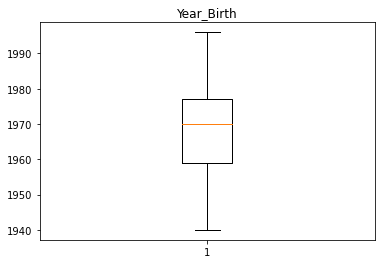

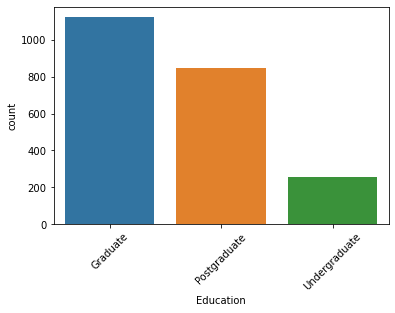

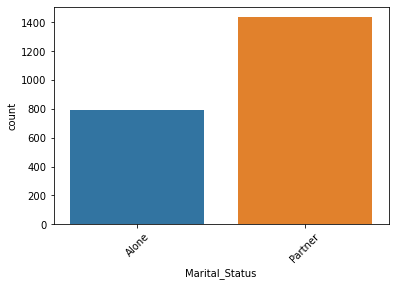

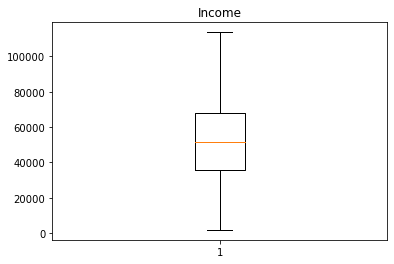

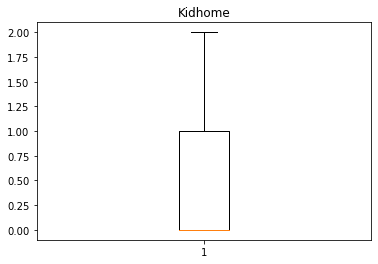

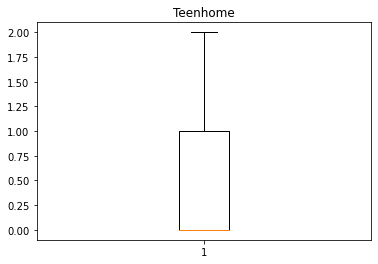

<Figure size 432x288 with 0 Axes>

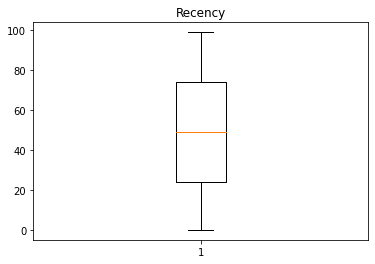

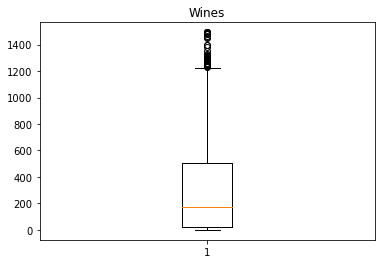

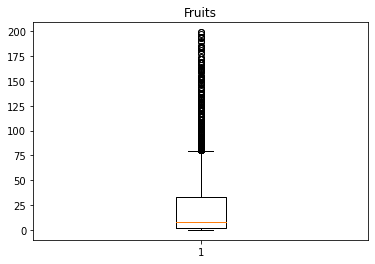

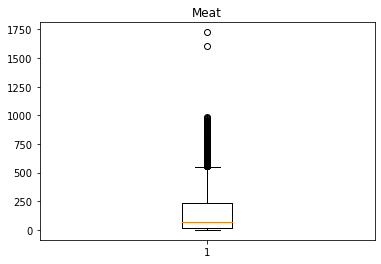

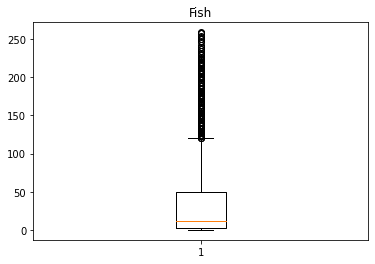

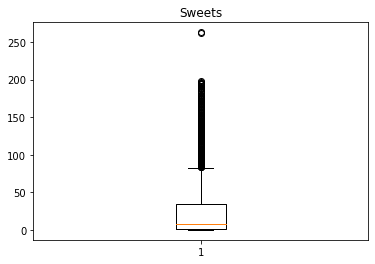

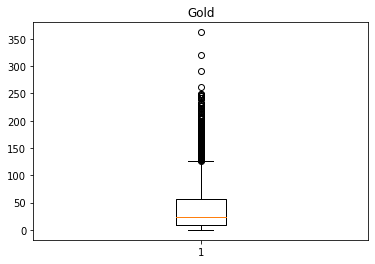

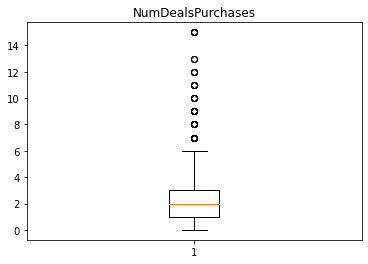

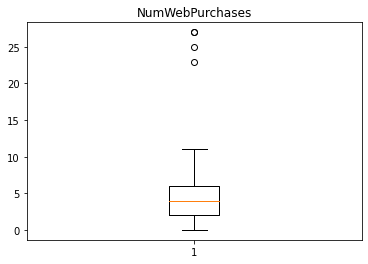

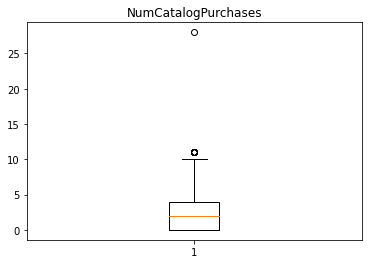

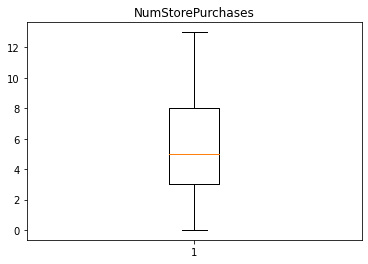

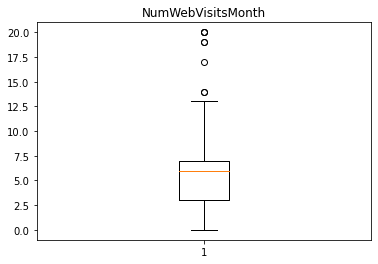

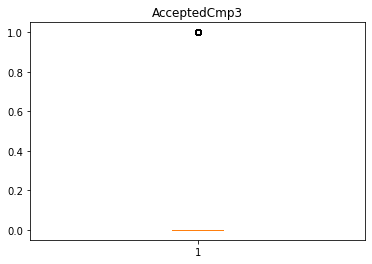

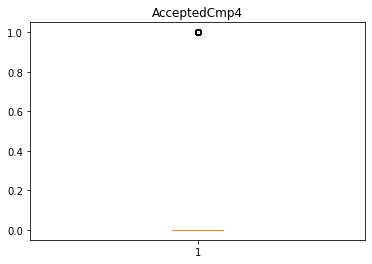

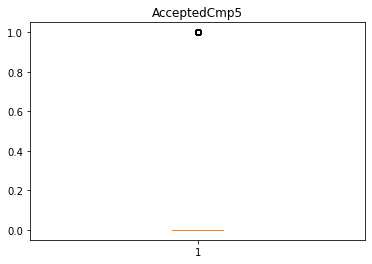

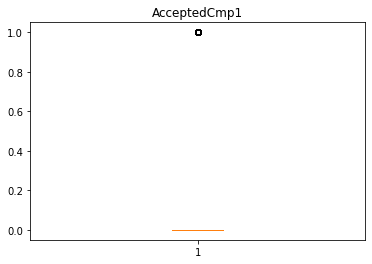

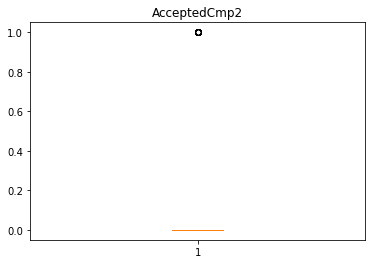

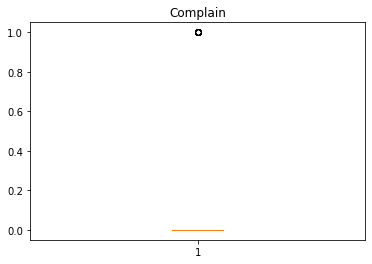

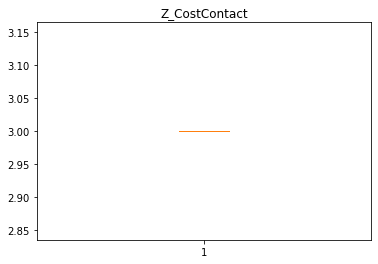

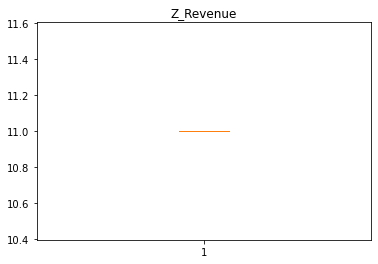

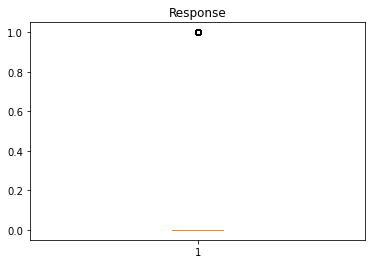

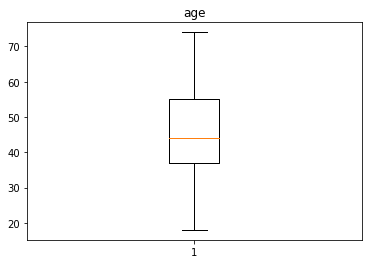

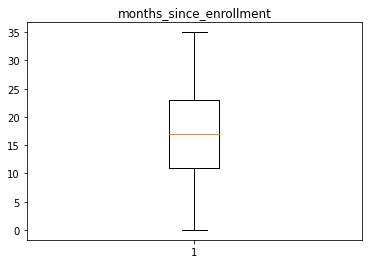

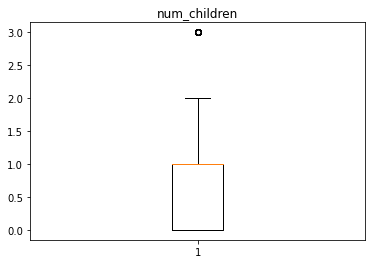

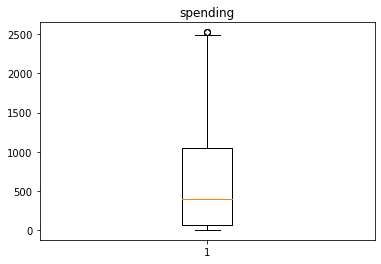

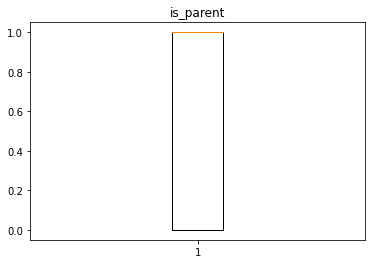

In [29]:
columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age',
'months_since_enrollment', 'num_children', 'spending', 'is_parent']

columns = Marketing_df.columns

for column in columns:
    plt.figure()
    if column in ['ID', 'Dt_Customer']:
        continue
    elif column in ['Education', 'Marital_Status']:
        sns.countplot(data=Marketing_df, x=column)
        plt.xticks(rotation=45)
    else:
        plt.boxplot(Marketing_df[column])
        plt.title(column)


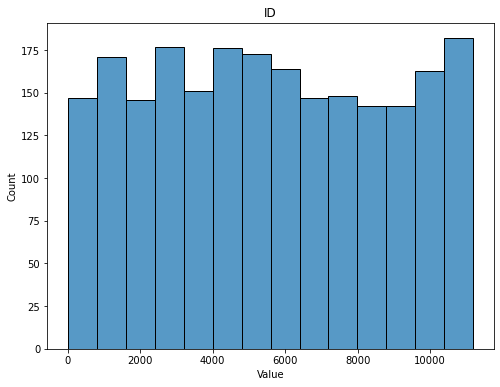

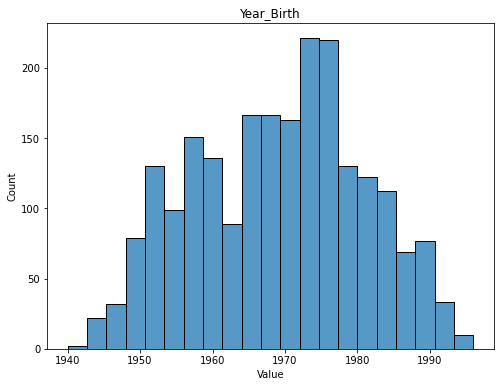

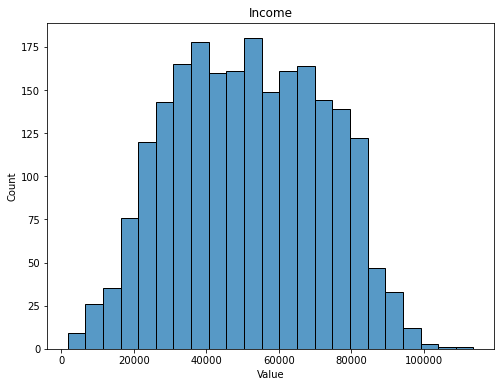

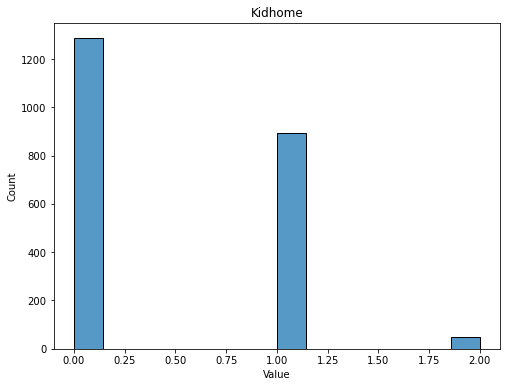

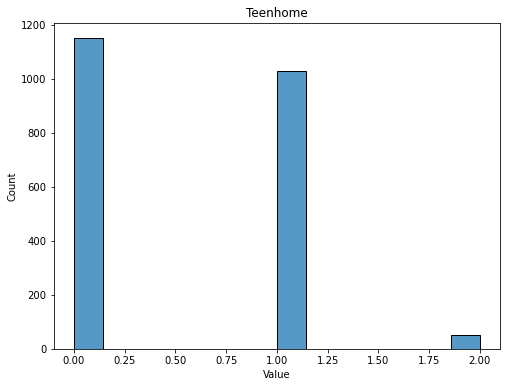

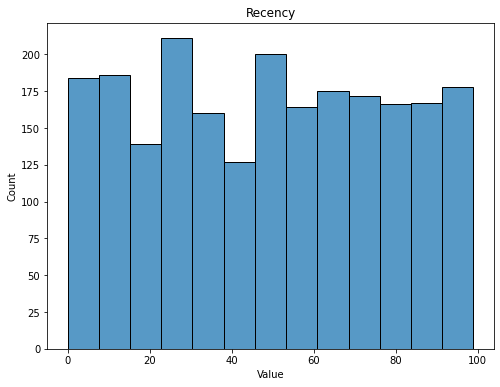

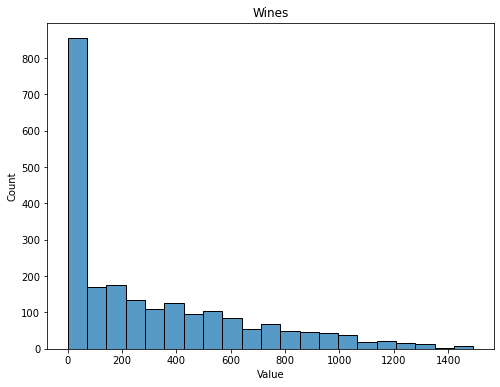

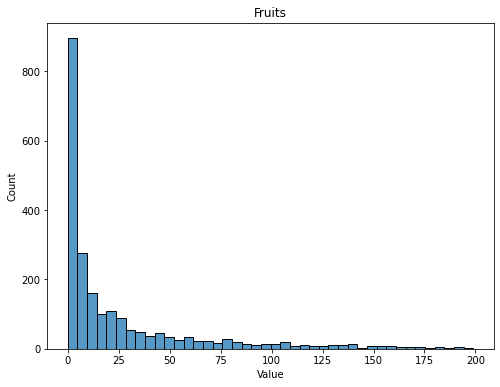

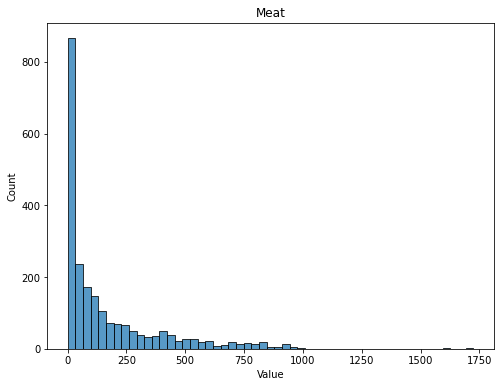

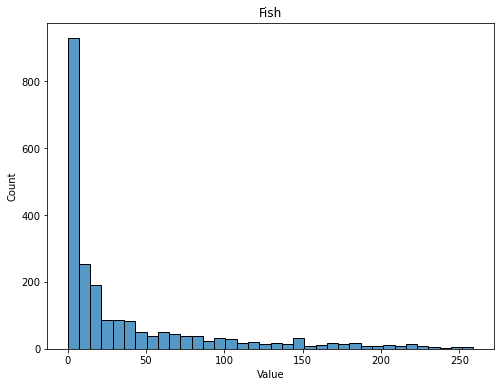

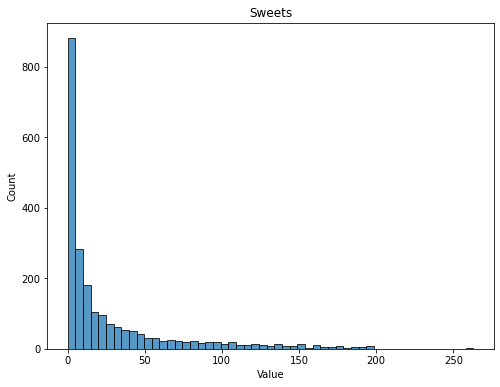

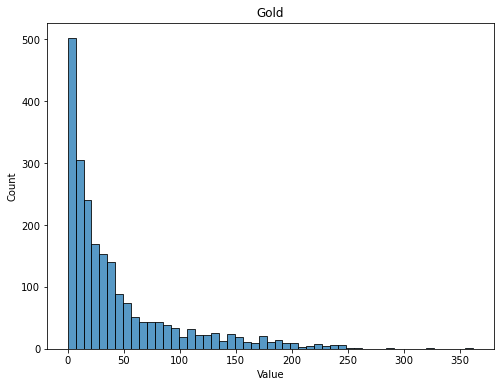

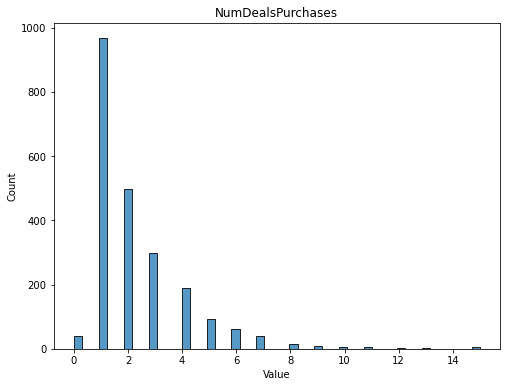

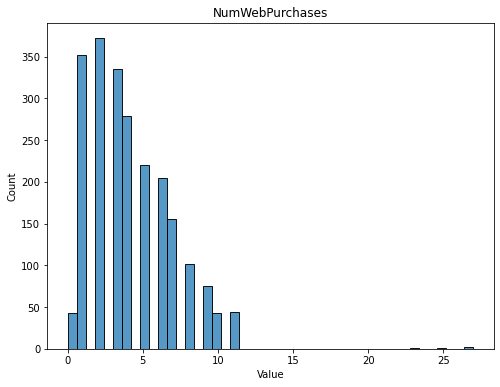

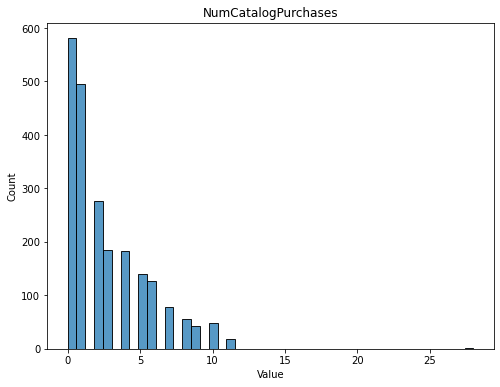

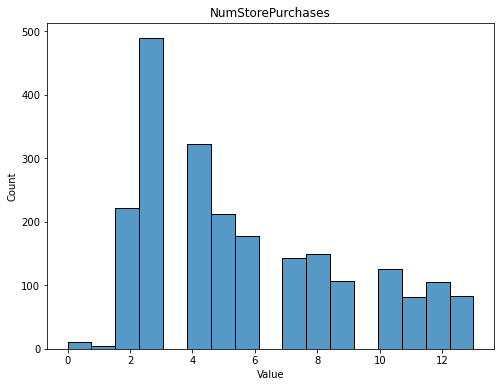

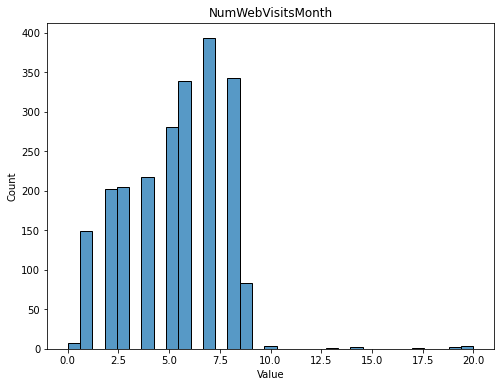

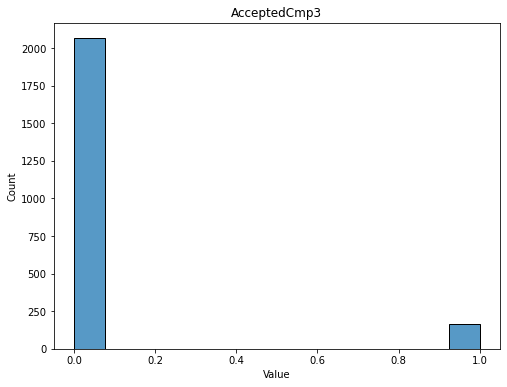

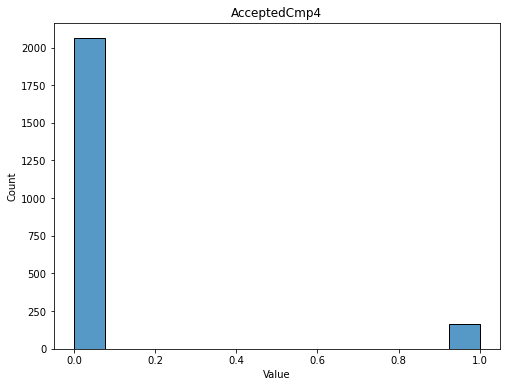

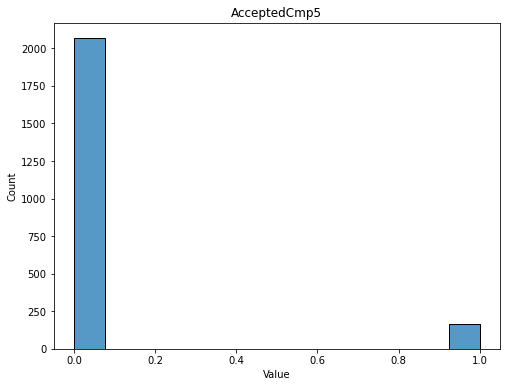

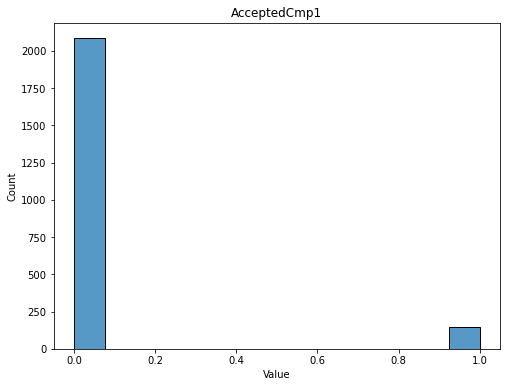

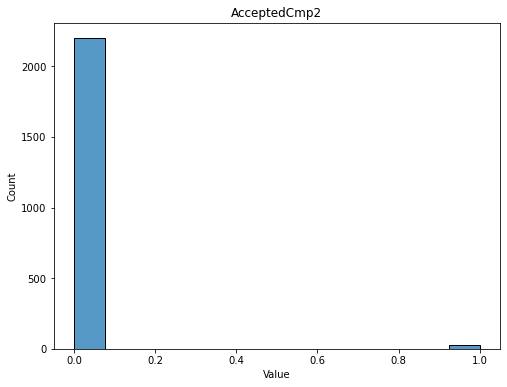

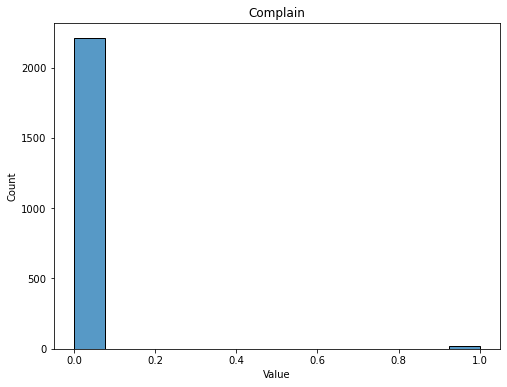

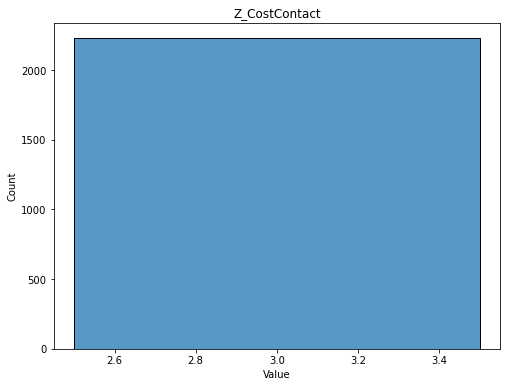

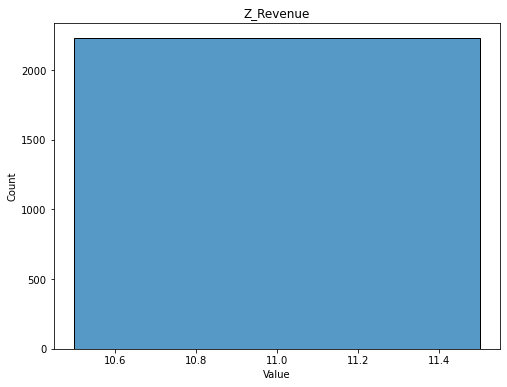

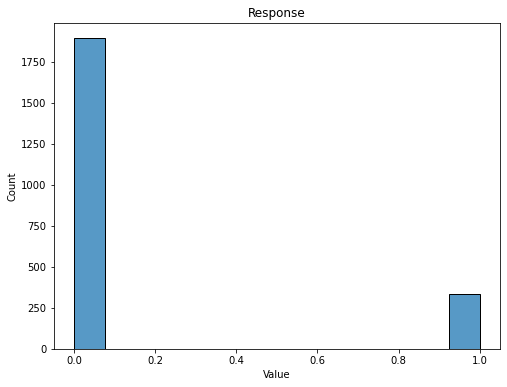

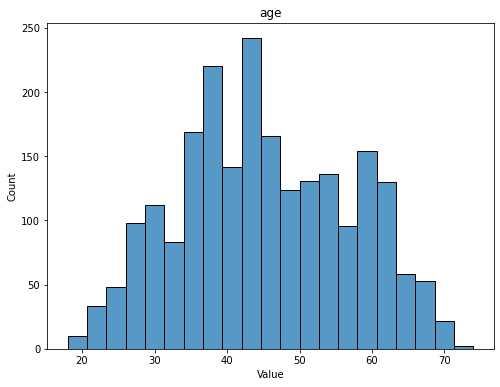

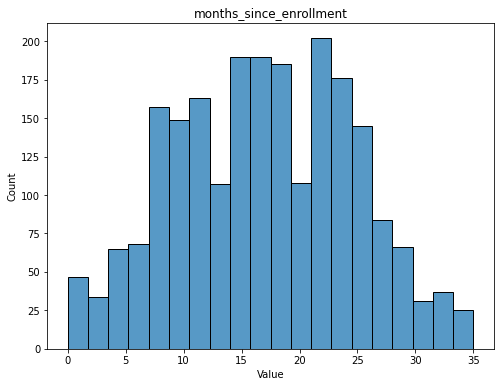

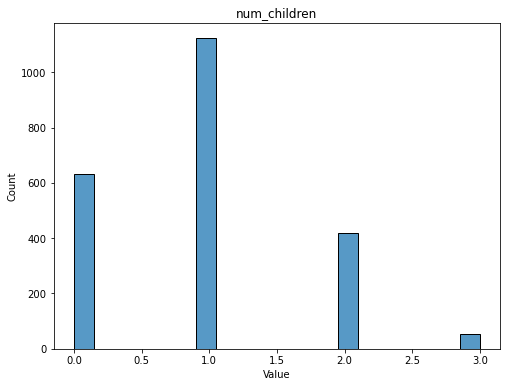

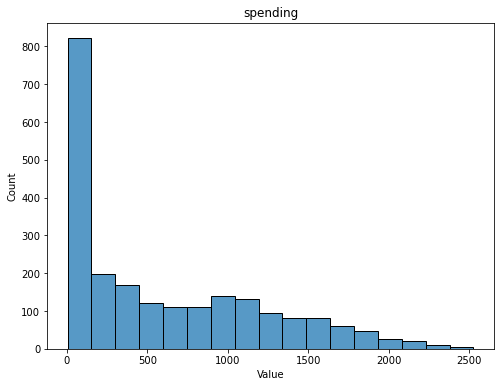

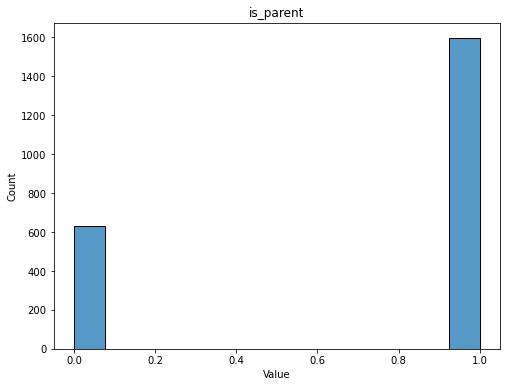

In [30]:
# Plot the distribution of values in each column
for col in Marketing_df.columns:
    if Marketing_df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(Marketing_df[col], kde=False)
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.show()
    elif Marketing_df[col].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=Marketing_df)
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.show()


## create a copy of the data frame to use it the pca 

In [31]:
Marketing_data=Marketing_df.copy()
Marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,months_since_enrollment,num_children,spending,is_parent
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,57,32.0,0,1617,0
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,60,4.0,2,27,1
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,49,16.0,0,776,0
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,30,2.0,1,53,1
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,33,11.0,1,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,47,18.0,1,1341,1
2236,4001,1946,Postgraduate,Partner,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,68,2.0,3,444,1
2237,7270,1981,Graduate,Alone,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,33,10.0,0,1241,0
2238,8235,1956,Postgraduate,Partner,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,58,10.0,1,843,1


In [32]:
Marketing_data = Marketing_df.copy()
Marketing_data.drop(['ID', 'Education','Marital_Status','Kidhome','Teenhome','Dt_Customer','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Year_Birth', 'Z_CostContact', 'Z_Revenue','Complain','Response','is_parent'], axis=1, inplace=True)
Marketing_data

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children,spending
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,57,32.0,0,1617
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,60,4.0,2,27
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,49,16.0,0,776
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,30,2.0,1,53
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,33,11.0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,47,18.0,1,1341
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,68,2.0,3,444
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,33,10.0,0,1241
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,58,10.0,1,843


In [33]:
Marketing_data.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children,spending
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,51619.504262,49.106326,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,2.319874,4.100045,2.636608,5.812472,5.334231,45.111261,16.825931,0.951996,605.541050
std,20601.216248,28.946476,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,1.895252,2.775461,2.796161,3.242144,2.414981,11.707430,7.673735,0.751976,601.032228
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000
25%,35416.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,37.000000,11.000000,0.000000,69.000000
50%,51381.500000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,44.000000,17.000000,1.000000,397.000000
75%,68118.000000,74.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,55.000000,23.000000,1.000000,1044.000000
max,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,74.000000,35.000000,3.000000,2525.000000


In [34]:
Marketing_data

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children,spending
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,57,32.0,0,1617
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,60,4.0,2,27
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,49,16.0,0,776
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,30,2.0,1,53
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,33,11.0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,47,18.0,1,1341
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,68,2.0,3,444
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,33,10.0,0,1241
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,58,10.0,1,843


<AxesSubplot:>

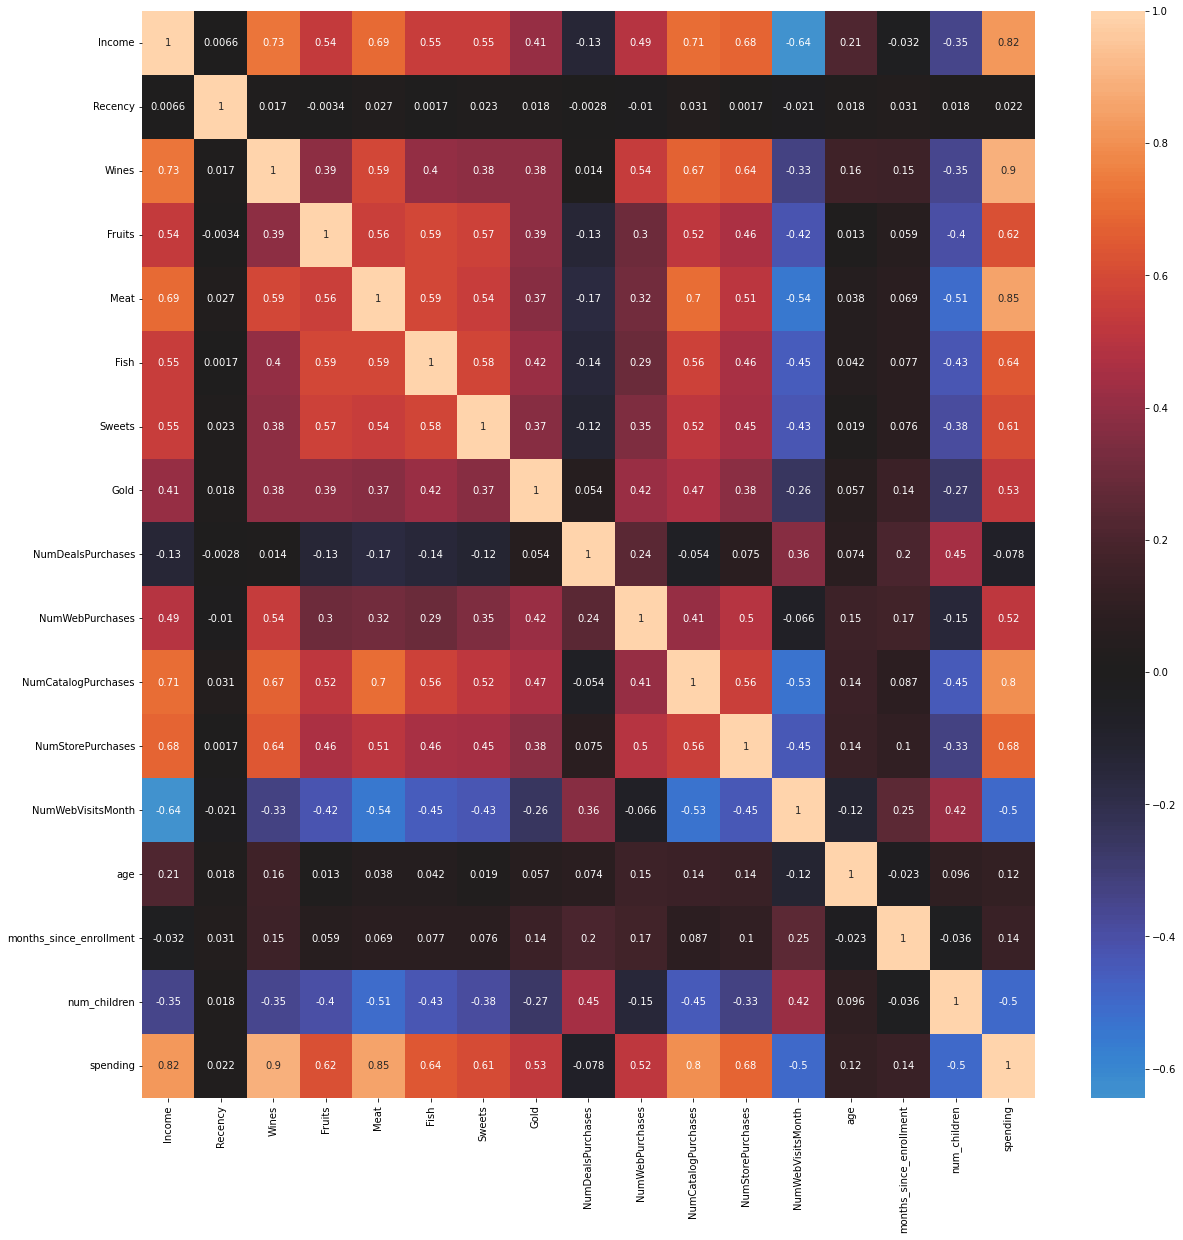

In [35]:
#correlation matrix
corrmat= Marketing_data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

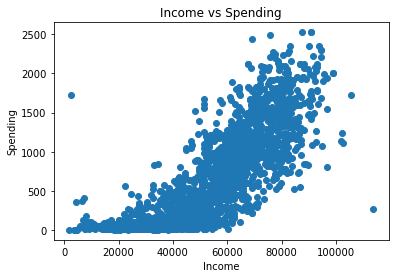

In [36]:
plt.scatter(Marketing_data['Income'], Marketing_data['spending'])
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Income vs Spending')
plt.show()

## Standrize the dataset

In [37]:
# Create a StandardScaler object
scaler = StandardScaler()

# Standardize each column in the DataFrame
scaled_data = scaler.fit_transform(Marketing_data)
Marketing_data_scaled = pd.DataFrame(scaled_data, columns=Marketing_data.columns)
Marketing_data_scaled


,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children,spending
0,0.316484,0.307314,0.980166,1.550778,1.736151,2.456789,1.472029,0.842690,0.358938,1.405471,2.633984,-0.559160,0.689920,1.015715,1.977847,-1.266277,1.683247
1,-0.256135,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,-0.168815,-1.117198,-0.585437,-1.176175,-0.138430,1.272020,-1.671782,1.393978,-0.962795
2,0.970719,-0.798422,0.359410,0.569773,-0.174584,1.341376,-0.149082,-0.040574,-0.696567,1.405471,-0.227723,1.291882,-0.552605,0.332234,-0.107655,-1.266277,0.283674
3,-1.212506,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,-0.584604,-0.751025,-0.168815,-0.756817,-0.943150,-0.559160,0.275745,-1.291031,-1.932469,0.063851,-0.919526
4,0.324010,1.551268,-0.392031,0.418849,-0.215626,0.152822,-0.003908,-0.559011,1.414444,0.324327,0.129990,0.057854,-0.138430,-1.034726,-0.759374,0.063851,-0.305445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0.466266,-0.107337,1.199955,0.418849,0.076229,0.079680,2.197900,3.895711,-0.168815,1.765853,0.129990,-0.559160,-0.138430,0.161364,0.153033,0.063851,1.223934
2225,0.601774,0.238206,0.300008,-0.662772,-0.616926,-0.688309,-0.657191,-0.693421,2.469949,1.405471,-0.227723,-0.250653,0.689920,1.955500,-1.932469,2.724106,-0.268833
2226,0.260310,1.447605,1.791009,0.544619,0.235837,-0.103175,-0.366843,-0.386199,-0.696567,-0.756817,0.129990,2.217403,0.275745,-1.034726,-0.889718,-1.266277,1.057517
2227,0.855748,-1.420399,0.365350,0.091848,0.222156,0.774527,0.068679,0.324253,-0.168815,0.684708,0.845417,1.291882,-0.966779,1.101150,-0.889718,0.063851,0.395174


## Dimensionality Reduction using PCA: 
Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset. By identifying the most significant features, PCA helped reduce computational complexity in subsequent clustering steps.

In [38]:
# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled data
pca.fit(Marketing_data_scaled)

# Transform the data to the principal components
transformed_data = pca.transform(Marketing_data_scaled)
transformed_data 

array([[ 4.34218129e+00,  1.29011305e+00],
       [-2.56664470e+00, -8.66067419e-01],
       [ 1.95934782e+00, -2.78108012e-01],
       ...,
       [ 1.66581510e+00, -7.91081461e-01],
       [ 1.92476229e+00,  1.72643994e-03],
       [-1.96683312e+00,  1.20828941e+00]])

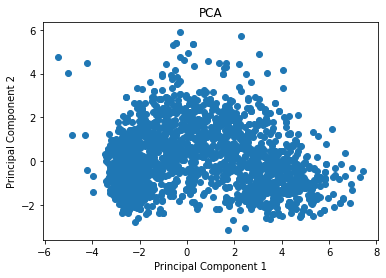

In [39]:
# Plot the PCA results
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()


## Determining the Number of Clusters using the Elbow Method:
The elbow method was employed to determine the optimal number of clusters for the k-means algorithm. By calculating the within-cluster sum of squares (WCSS) for different values of k, the elbow point was identified as the optimal number of clusters.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


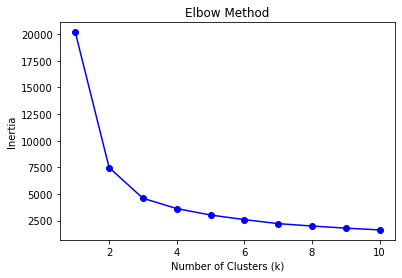

In [40]:
# Perform K-means clustering with different values of k
inertia = []
k_values = range(1, 11)  # Range of k values to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_data[:, :2])  # Use the first two principal components
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


## K-means Clustering:
The k-means algorithm was executed on the preprocessed and dimensionality-reduced dataset. The number of clusters was set based on the result obtained from the elbow method. The algorithm iteratively assigned each observation to its nearest centroid and updated the centroids until convergence.

In [41]:
k = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
 # Use the first two principal components
kmeans.fit(transformed_data[:, :2]) 
# Cluster labels assigned to each data point
labels = kmeans.labels_  
 # Coordinates of the cluster centers
centroids = kmeans.cluster_centers_ 
Marketing_data['Clusters']=labels

## Cluster Visualization: 
The resulting clusters were visualized by plotting the data points, colored according to their assigned clusters. This visualization provided insights into how the clusters shaped the data, revealing distinct patterns and relationships within the dataset

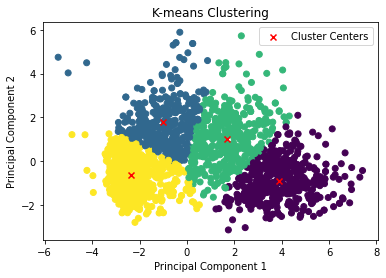

In [42]:

# Plot the clusters
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


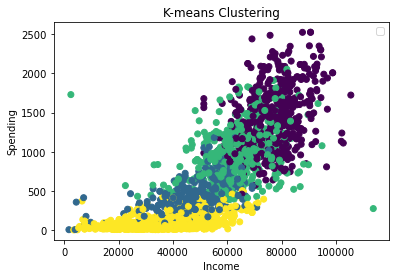

In [43]:
# Plot the clusters with Income and spending
plt.scatter(Marketing_data['Income'], Marketing_data['spending'], c=labels)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('K-means Clustering')
plt.legend()
plt.show()


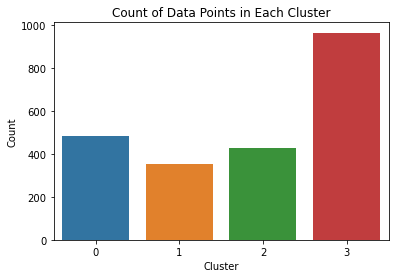

In [44]:
# Plot the count of each cluster
sns.countplot(x=labels)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Data Points in Each Cluster')
plt.show()


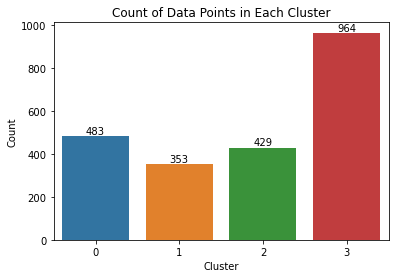

In [45]:
# Plot the count of each cluster
ax = sns.countplot(x=labels)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Data Points in Each Cluster')
plt.show()


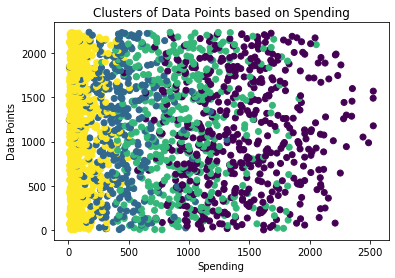

In [46]:
# Plot the clusters with spending
plt.scatter(Marketing_data['spending'], Marketing_data.index, c=labels)
plt.xlabel('Spending')
plt.ylabel('Data Points')
plt.title('Clusters of Data Points based on Spending')
plt.show()


In [47]:
Marketing_data

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children,spending,Clusters
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,57,32.0,0,1617,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,60,4.0,2,27,3
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,49,16.0,0,776,2
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,30,2.0,1,53,3
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,33,11.0,1,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,47,18.0,1,1341,2
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,68,2.0,3,444,1
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,33,10.0,0,1241,2
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,58,10.0,1,843,2


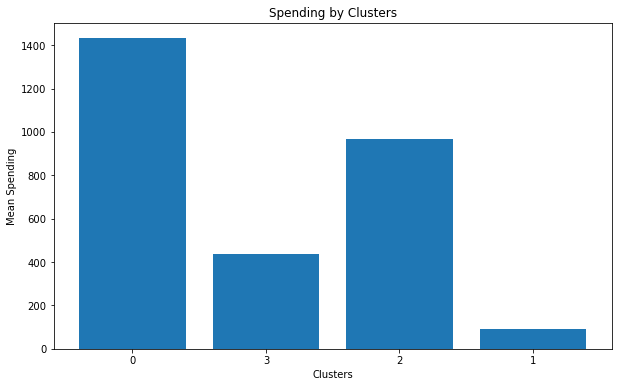

In [48]:
# Group the data by clusters and calculate the mean spending for each cluster
cluster_spending = Marketing_data.groupby('Clusters')['spending'].mean()

# Create a list of unique cluster labels
cluster_labels = Marketing_data['Clusters'].unique()

# Create an array of corresponding x-axis positions
x_pos = np.arange(len(cluster_labels))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_pos, cluster_spending.values)
plt.xlabel('Clusters')
plt.ylabel('Mean Spending')
plt.title('Spending by Clusters')

# Set the x-axis ticks and labels
plt.xticks(x_pos, cluster_labels)

plt.show()


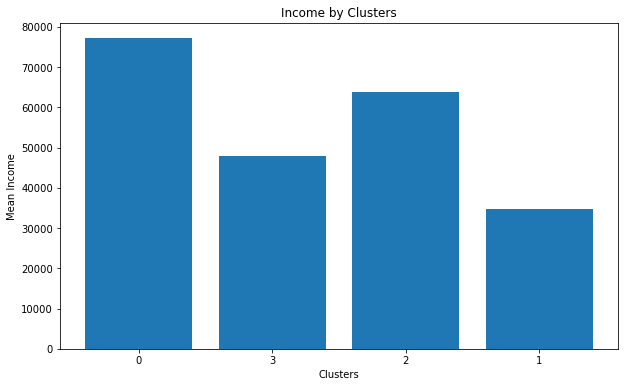

In [49]:
# Group the data by clusters and calculate the mean income for each cluster
cluster_income = Marketing_data.groupby('Clusters')['Income'].mean()

# Create a list of unique cluster labels
cluster_labels = Marketing_data['Clusters'].unique()

# Create an array of corresponding x-axis positions
x_pos = np.arange(len(cluster_labels))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_pos, cluster_income.values)
plt.xlabel('Clusters')
plt.ylabel('Mean Income')
plt.title('Income by Clusters')

# Set the x-axis ticks and labels
plt.xticks(x_pos, cluster_labels)

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7636\1801998204.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = Marketing_data.groupby('Clusters')['spending', 'Income'].mean()


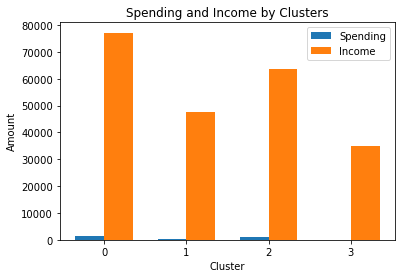

In [50]:
# Group the data by cluster and calculate the mean of spending and income
cluster_means = Marketing_data.groupby('Clusters')['spending', 'Income'].mean()

# Get the number of clusters
num_clusters = len(cluster_means)

# Set the bar width
bar_width = 0.35

# Generate an array of cluster indices
cluster_indices = np.arange(num_clusters)

# Plot the spending by clusters
plt.bar(cluster_indices, cluster_means['spending'], bar_width, label='Spending')

# Plot the income by clusters
plt.bar(cluster_indices + bar_width, cluster_means['Income'], bar_width, label='Income')

# Set the x-axis tick labels
plt.xticks(cluster_indices + bar_width/2, cluster_indices)

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.title('Spending and Income by Clusters')

# Add a legend
plt.legend()

# Show the plot
plt.show()


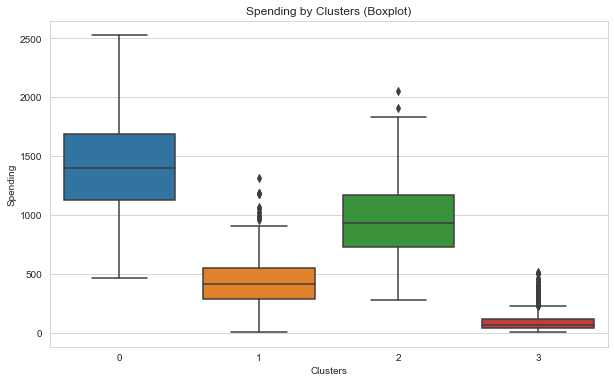

In [51]:
# Set the plot style
sns.set_style('whitegrid')

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='spending', data=Marketing_data)
plt.xlabel('Clusters')
plt.ylabel('Spending')
plt.title('Spending by Clusters (Boxplot)')

plt.show()




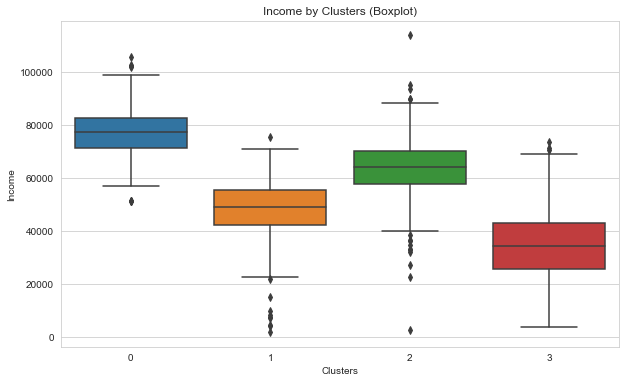

In [52]:
# Assuming your dataframe is named 'df'
# Replace 'spending' and 'Clusters' with the actual column names

# Set the plot style
sns.set_style('whitegrid')

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Income', data=Marketing_data)
plt.xlabel('Clusters')
plt.ylabel('Income')
plt.title('Income by Clusters (Boxplot)')

plt.show()



In [53]:
Marketing_data

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children,spending,Clusters
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,57,32.0,0,1617,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,60,4.0,2,27,3
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,49,16.0,0,776,2
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,30,2.0,1,53,3
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,33,11.0,1,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,47,18.0,1,1341,2
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,68,2.0,3,444,1
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,33,10.0,0,1241,2
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,58,10.0,1,843,2


In [54]:
# Reordering the columns
Marketing_data= Marketing_data[['Income', 'spending', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
         'NumWebVisitsMonth', 'age', 'months_since_enrollment', 'num_children', 'Clusters']]

In [55]:
# Add cluster labels to Marketing_df
Marketing_data['Clusters'] = labels

# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_data.groupby('Clusters').mean()

# Display the mean values for each cluster as a DataFrame
cluster_means


,Income,spending,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children
Clusters,,,,,,,,,,,,,,,,,
0,77181.871636,1432.302277,49.337474,617.451346,70.660455,488.536232,104.805383,73.395445,77.453416,1.080745,4.917184,6.072464,8.482402,2.482402,45.215321,16.248447,0.136646
1,47799.770538,436.575071,49.124646,281.589235,9.121813,75.708215,14.739377,8.716714,46.699717,4.804533,5.742210,1.849858,5.617564,7.042493,47.963173,20.631728,1.481586
2,63697.828671,968.871795,49.440559,568.920746,38.729604,198.785548,50.125874,39.951049,72.358974,2.897436,6.617716,4.156177,8.729604,5.076923,48.836830,18.832168,0.909091
3,34835.418568,91.485477,48.835062,39.552905,4.945021,21.214730,6.822614,5.059129,13.891079,1.773859,1.968880,0.526971,3.247925,6.252075,42.356846,14.828838,1.185685


In [56]:
# Add cluster labels to Marketing_df
Marketing_data['Clusters'] = labels

# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_data.groupby('Clusters')['Income','spending'].mean().round(2)

# Display the mean values for each cluster as a DataFrame
cluster_means

C:\Users\Admin\AppData\Local\Temp\ipykernel_7636\4124177961.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = Marketing_data.groupby('Clusters')['Income','spending'].mean().round(2)


,Income,spending
Clusters,,
0,77181.87,1432.30
1,47799.77,436.58
2,63697.83,968.87
3,34835.42,91.49


In [57]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_df.groupby('Clusters')['Education','Marital_Status','age', 'months_since_enrollment', 'num_children','is_parent'].mean().round(2)

# Display the mean values for each cluster as a DataFrame
cluster_means

C:\Users\Admin\AppData\Local\Temp\ipykernel_7636\3900519646.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = Marketing_df.groupby('Clusters')['Education','Marital_Status','age', 'months_since_enrollment', 'num_children','is_parent'].mean().round(2)


,age,months_since_enrollment,num_children,is_parent
Clusters,,,,
0,45.22,16.25,0.14,0.13
1,47.96,20.63,1.48,0.97
2,48.84,18.83,0.91,0.82
3,42.36,14.83,1.19,0.87


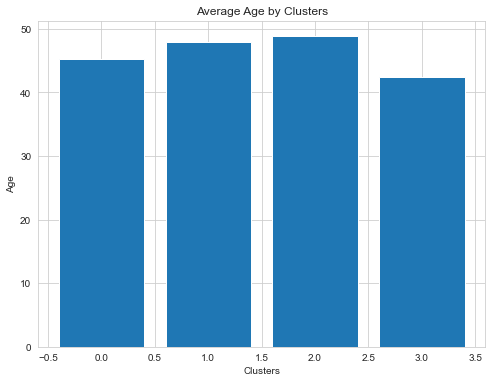

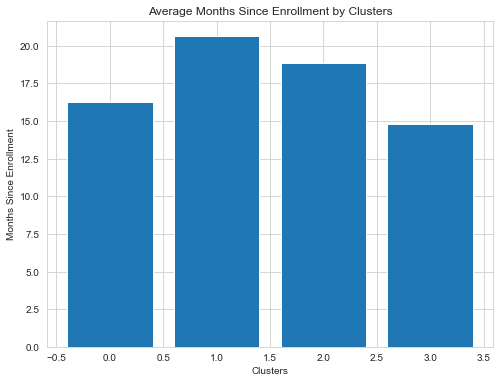

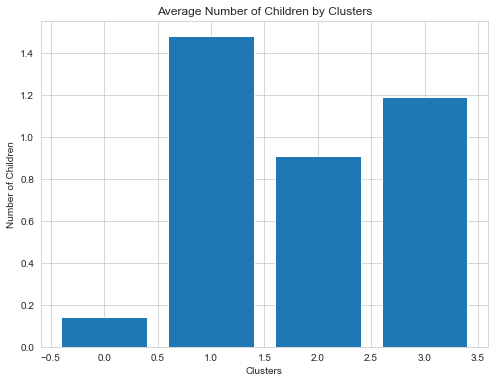

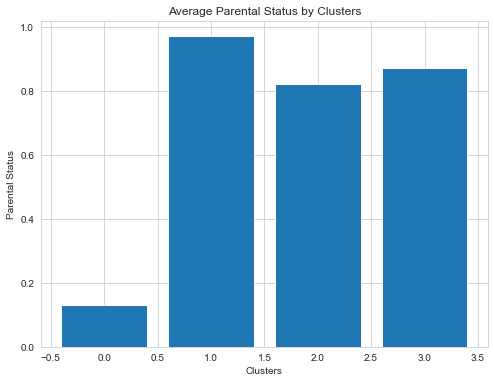

In [58]:
# Get the mean values for each cluster
age_means = cluster_means['age']
months_means = cluster_means['months_since_enrollment']
children_means = cluster_means['num_children']
parental_means = cluster_means['is_parent']

# Plot for Age
plt.figure(figsize=(8, 6))
plt.bar(cluster_means.index, age_means)
plt.xlabel('Clusters')
plt.ylabel('Age')
plt.title('Average Age by Clusters')
plt.show()

# Plot for Months Since Enrollment
plt.figure(figsize=(8, 6))
plt.bar(cluster_means.index, months_means)
plt.xlabel('Clusters')
plt.ylabel('Months Since Enrollment')
plt.title('Average Months Since Enrollment by Clusters')
plt.show()

# Plot for Number of Children
plt.figure(figsize=(8, 6))
plt.bar(cluster_means.index, children_means)
plt.xlabel('Clusters')
plt.ylabel('Number of Children')
plt.title('Average Number of Children by Clusters')
plt.show()

# Plot for Parental Status
plt.figure(figsize=(8, 6))
plt.bar(cluster_means.index, parental_means)
plt.xlabel('Clusters')
plt.ylabel('Parental Status')
plt.title('Average Parental Status by Clusters')
plt.show()


In [59]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Display the distribution of categorical variables for each cluster
for cluster_label, group in grouped_df:
    cluster_distribution = group[['Education']].apply(lambda x: x.value_counts(normalize=True)).round(2)
    print("Cluster:", cluster_label)
    print(cluster_distribution)
    print()


Cluster: 0
               Education
Graduate            0.56
Postgraduate        0.34
Undergraduate       0.10

Cluster: 1
               Education
Graduate            0.51
Postgraduate        0.44
Undergraduate       0.05

Cluster: 2
               Education
Graduate            0.49
Postgraduate        0.43
Undergraduate       0.08

Cluster: 3
               Education
Graduate            0.48
Postgraduate        0.36
Undergraduate       0.16



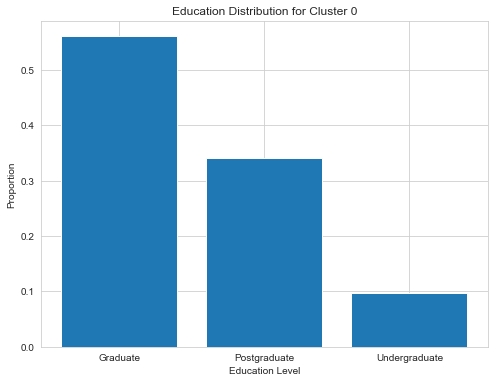

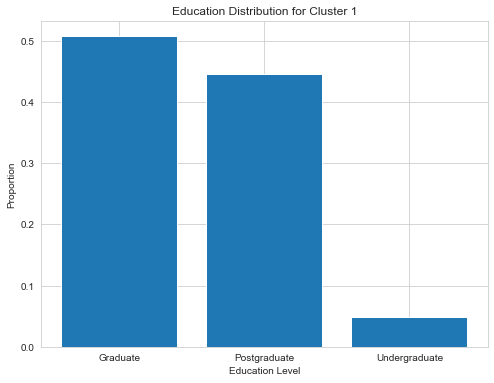

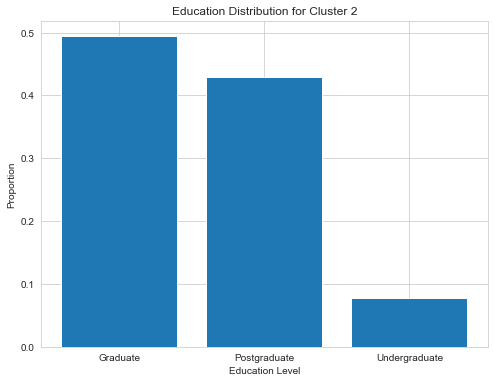

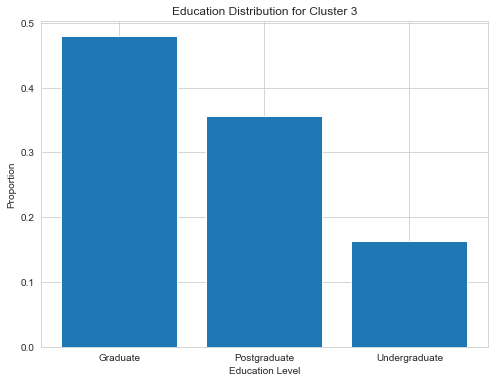

In [60]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Iterate over each cluster and plot the education distribution
for cluster_label, group in grouped_df:
    cluster_distribution = group['Education'].value_counts(normalize=True).sort_index()
    
    # Plotting the education distribution for each cluster
    plt.figure(figsize=(8, 6))
    plt.bar(cluster_distribution.index, cluster_distribution.values)
    plt.xlabel('Education Level')
    plt.ylabel('Proportion')
    plt.title(f'Education Distribution for Cluster {cluster_label}')
    plt.show()


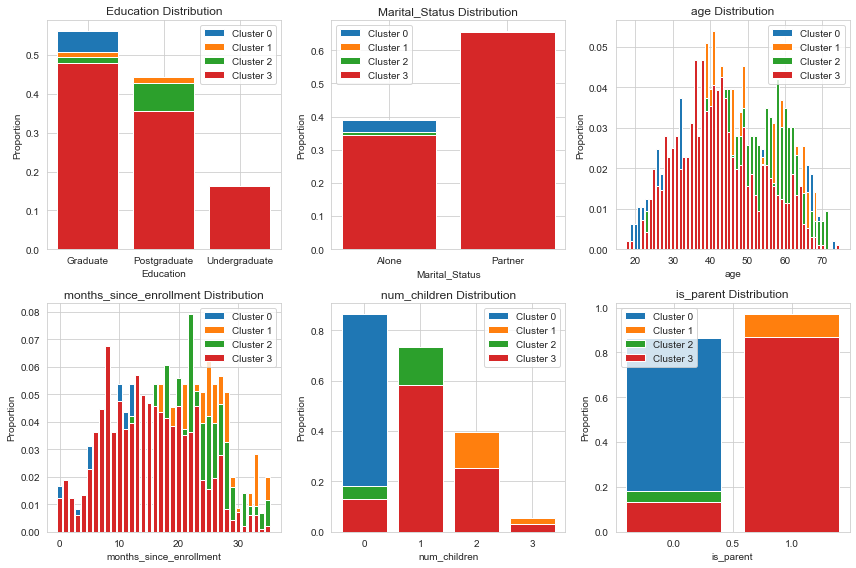

In [61]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Iterate over each variable and plot the distribution for each cluster
variables = ['Education', 'Marital_Status', 'age', 'months_since_enrollment', 'num_children', 'is_parent']
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    
    # Iterate over each cluster
    for cluster_label, group in grouped_df:
        cluster_distribution = group[var].value_counts(normalize=True).sort_index()
        
        # Plotting the distribution for each cluster
        axes[row, col].bar(cluster_distribution.index, cluster_distribution.values, label=f'Cluster {cluster_label}')
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel('Proportion')
        axes[row, col].set_title(f'{var} Distribution')
        axes[row, col].legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


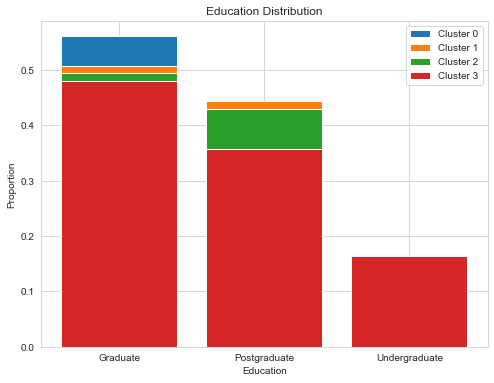

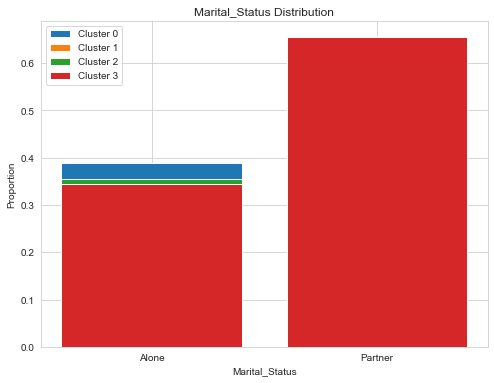

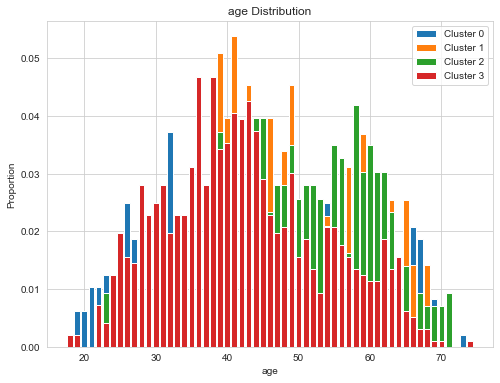

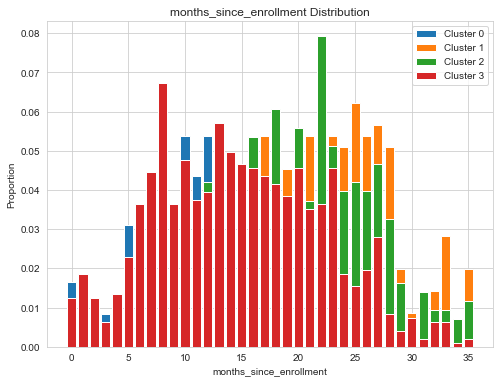

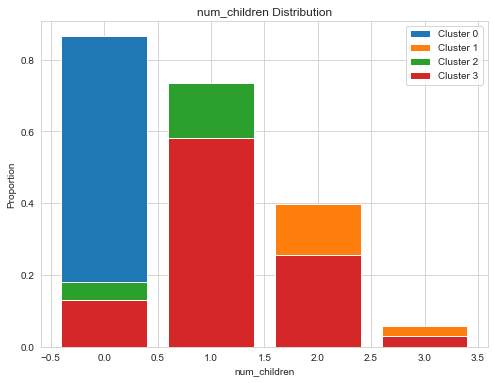

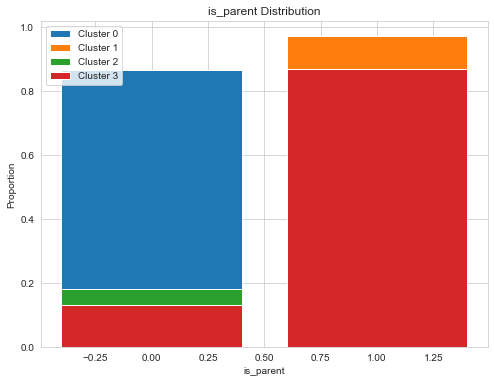

In [62]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Iterate over each variable and plot the distribution for each cluster
variables = ['Education', 'Marital_Status', 'age', 'months_since_enrollment', 'num_children', 'is_parent']
for var in variables:
    # Create a separate plot for each variable
    plt.figure(figsize=(8, 6))
    
    # Iterate over each cluster
    for cluster_label, group in grouped_df:
        cluster_distribution = group[var].value_counts(normalize=True).sort_index()
        
        # Plotting the distribution for each cluster
        plt.bar(cluster_distribution.index, cluster_distribution.values, label=f'Cluster {cluster_label}')
        plt.xlabel(var)
        plt.ylabel('Proportion')
        plt.title(f'{var} Distribution')
        plt.legend()
    
    # Show the plot for the current variable
    plt.show()

    

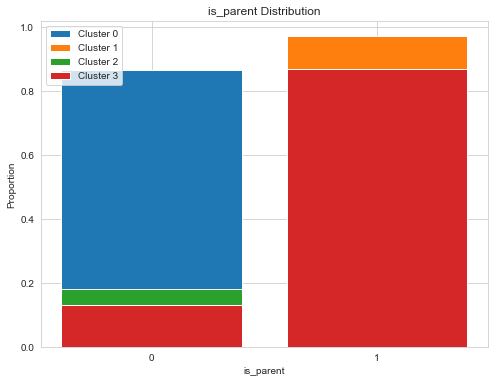

In [63]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Create a separate plot for the 'is_parent' variable
plt.figure(figsize=(8, 6))

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_distribution = group['is_parent'].value_counts(normalize=True).sort_index()

    # Plotting the distribution for each cluster
    plt.bar(cluster_distribution.index, cluster_distribution.values, label=f'Cluster {cluster_label}')

# Set the x-axis ticks to 0 and 1
plt.xticks([0, 1])

# Set labels and title
plt.xlabel('is_parent')
plt.ylabel('Proportion')
plt.title('is_parent Distribution')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [64]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Display the distribution of categorical variables for each cluster
for cluster_label, group in grouped_df:
    cluster_distribution = group[['Marital_Status']].apply(lambda x: x.value_counts(normalize=True)).round(2)
    print("Cluster:", cluster_label)
    print(cluster_distribution)
    print()


Cluster: 0
         Marital_Status
Partner            0.61
Alone              0.39

Cluster: 1
         Marital_Status
Partner            0.66
Alone              0.34

Cluster: 2
         Marital_Status
Partner            0.65
Alone              0.35

Cluster: 3
         Marital_Status
Partner            0.66
Alone              0.34



In [65]:
Marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,age,months_since_enrollment,num_children,spending,is_parent,Clusters
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,57,32.0,0,1617,0,0
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,60,4.0,2,27,1,3
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49,16.0,0,776,0,2
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,30,2.0,1,53,1,3
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33,11.0,1,422,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,47,18.0,1,1341,1,2
2236,4001,1946,Postgraduate,Partner,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,68,2.0,3,444,1,1
2237,7270,1981,Graduate,Alone,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,33,10.0,0,1241,0,2
2238,8235,1956,Postgraduate,Partner,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,58,10.0,1,843,1,2


In [66]:
# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_data.groupby('Clusters').mean()

# Sort the clusters by income
cluster_means_sorted = cluster_means.sort_values(by='Income')

# Display the mean values for each cluster as a DataFrame
cluster_means_sorted


,Income,spending,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,months_since_enrollment,num_children
Clusters,,,,,,,,,,,,,,,,,
3,34835.418568,91.485477,48.835062,39.552905,4.945021,21.214730,6.822614,5.059129,13.891079,1.773859,1.968880,0.526971,3.247925,6.252075,42.356846,14.828838,1.185685
1,47799.770538,436.575071,49.124646,281.589235,9.121813,75.708215,14.739377,8.716714,46.699717,4.804533,5.742210,1.849858,5.617564,7.042493,47.963173,20.631728,1.481586
2,63697.828671,968.871795,49.440559,568.920746,38.729604,198.785548,50.125874,39.951049,72.358974,2.897436,6.617716,4.156177,8.729604,5.076923,48.836830,18.832168,0.909091
0,77181.871636,1432.302277,49.337474,617.451346,70.660455,488.536232,104.805383,73.395445,77.453416,1.080745,4.917184,6.072464,8.482402,2.482402,45.215321,16.248447,0.136646


In [67]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_df.groupby('Clusters').mean()

# Sort the clusters by income
cluster_means_sorted = cluster_means.sort_values(by='Income')

# Display the mean values for each cluster as a DataFrame
cluster_means_sorted

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,months_since_enrollment,num_children,spending,is_parent
Clusters,,,,,,,,,,,,,,,,,,,,,
3,5627.063278,1971.643154,34835.418568,0.745851,0.439834,48.835062,39.552905,4.945021,21.214730,6.822614,...,0.002075,0.009336,3.0,11.0,0.072614,42.356846,14.828838,1.185685,91.485477,0.868257
1,5512.504249,1966.036827,47799.770538,0.583569,0.898017,49.124646,281.589235,9.121813,75.708215,14.739377,...,0.011331,0.011331,3.0,11.0,0.184136,47.963173,20.631728,1.481586,436.575071,0.971671
2,5506.463869,1965.163170,63697.828671,0.135198,0.773893,49.440559,568.920746,38.729604,198.785548,50.125874,...,0.025641,0.011655,3.0,11.0,0.151515,48.836830,18.832168,0.909091,968.871795,0.818182
0,5643.612836,1968.784679,77181.871636,0.016563,0.120083,49.337474,617.451346,70.660455,488.536232,104.805383,...,0.026915,0.004141,3.0,11.0,0.277433,45.215321,16.248447,0.136646,1432.302277,0.134576


In [68]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_df.groupby('Clusters')['is_parent'].mean().round(2)

# Display the mean values for each cluster as a DataFrame
cluster_means

Clusters
0    0.13
1    0.97
2    0.82
3    0.87
Name: is_parent, dtype: float64

In [69]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Display the distribution of categorical variables for each cluster
for cluster_label, group in grouped_df:
    cluster_distribution = group[['is_parent']].apply(lambda x: x.value_counts(normalize=True)).round(2)
    print("Cluster:", cluster_label)
    print(cluster_distribution)
    print()


Cluster: 0
   is_parent
0       0.87
1       0.13

Cluster: 1
   is_parent
1       0.97
0       0.03

Cluster: 2
   is_parent
1       0.82
0       0.18

Cluster: 3
   is_parent
1       0.87
0       0.13



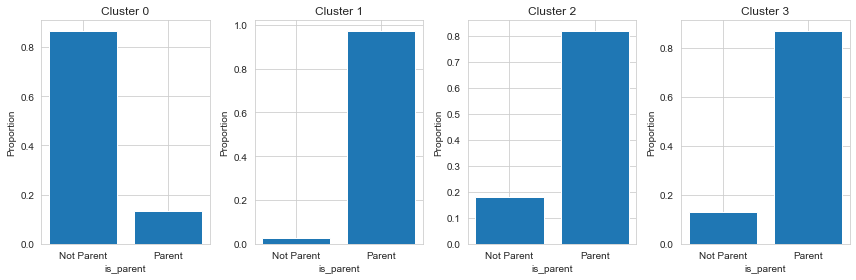

In [70]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(grouped_df), figsize=(12, 4))

# Iterate over each cluster and plot the distribution of 'is_parent'
for i, (cluster_label, group) in enumerate(grouped_df):
    cluster_distribution = group['is_parent'].value_counts(normalize=True).sort_index()

    # Plotting the distribution for each cluster
    axes[i].bar(cluster_distribution.index, cluster_distribution.values)
    axes[i].set_xlabel('is_parent')
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'Cluster {cluster_label}')

    # Set the x-axis ticks to 0 and 1
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Not Parent', 'Parent'])

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


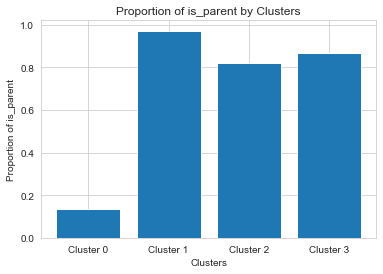

In [71]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_proportions = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_proportions.append(group['is_parent'].mean())

# Plot the proportions of 'is_parent' for each cluster
plt.bar(cluster_labels, cluster_proportions)
plt.xlabel('Clusters')
plt.ylabel('Proportion of is_parent')
plt.title('Proportion of is_parent by Clusters')

# Show the plot
plt.show()


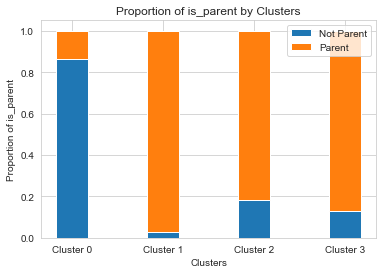

In [72]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_proportions_not_parent = []
cluster_proportions_parent = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_proportions_not_parent.append(1 - group['is_parent'].mean())
    cluster_proportions_parent.append(group['is_parent'].mean())

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the proportions of 'is_parent' for each cluster
plt.bar(bar_positions, cluster_proportions_not_parent, width=bar_width, label='Not Parent')
plt.bar(bar_positions, cluster_proportions_parent, width=bar_width, label='Parent', bottom=cluster_proportions_not_parent)

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Proportion of is_parent')
plt.title('Proportion of is_parent by Clusters')
plt.xticks(bar_positions, cluster_labels)
plt.legend()

# Show the plot
plt.show()


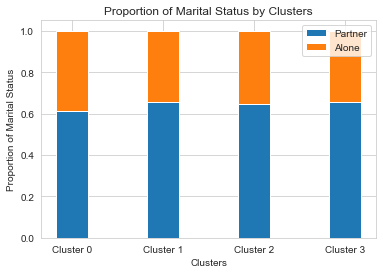

In [73]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_proportions_married = []
cluster_proportions_single = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_proportions_married.append(group['Marital_Status'].value_counts(normalize=True)['Partner'])
    cluster_proportions_single.append(group['Marital_Status'].value_counts(normalize=True)['Alone'])

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the proportions of 'Marital_Status' for each cluster
plt.bar(bar_positions, cluster_proportions_married, width=bar_width, label='Partner')
plt.bar(bar_positions, cluster_proportions_single, width=bar_width, label='Alone', bottom=cluster_proportions_married)

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Proportion of Marital Status')
plt.title('Proportion of Marital Status by Clusters')
plt.xticks(bar_positions, cluster_labels)
plt.legend()

# Show the plot
plt.show()


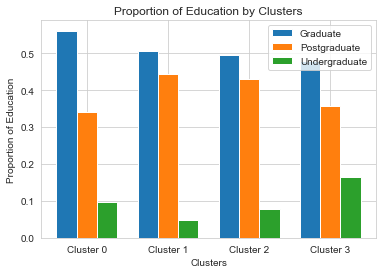

In [74]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_proportions_graduate = []
cluster_proportions_postgraduate = []
cluster_proportions_undergraduate = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_proportions_graduate.append(group['Education'].value_counts(normalize=True)['Graduate'])
    cluster_proportions_postgraduate.append(group['Education'].value_counts(normalize=True)['Postgraduate'])
    cluster_proportions_undergraduate.append(group['Education'].value_counts(normalize=True)['Undergraduate'])

# Set the width of each bar
bar_width = 0.25

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the proportions of 'Education' for each cluster
plt.bar(bar_positions, cluster_proportions_graduate, width=bar_width, label='Graduate')
plt.bar([p + bar_width for p in bar_positions], cluster_proportions_postgraduate, width=bar_width, label='Postgraduate')
plt.bar([p + 2 * bar_width for p in bar_positions], cluster_proportions_undergraduate, width=bar_width, label='Undergraduate')

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Proportion of Education')
plt.title('Proportion of Education by Clusters')
plt.xticks([p + bar_width for p in bar_positions], cluster_labels)
plt.legend()

# Show the plot
plt.show()


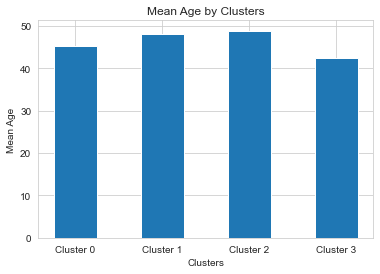

In [75]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_age_means = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_age_means.append(group['age'].mean())

# Set the width of each bar
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the mean age for each cluster
plt.bar(bar_positions, cluster_age_means, width=bar_width)

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Mean Age')
plt.title('Mean Age by Clusters')
plt.xticks(bar_positions, cluster_labels)

# Show the plot
plt.show()


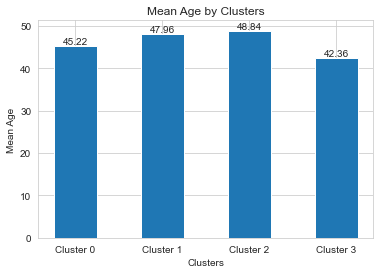

In [76]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_age_means = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_age_means.append(group['age'].mean())

# Set the width of each bar
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the mean age for each cluster
plt.bar(bar_positions, cluster_age_means, width=bar_width)

# Add labels to the bars
for i, age_mean in enumerate(cluster_age_means):
    plt.text(i, age_mean, f'{age_mean:.2f}', ha='center', va='bottom')

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Mean Age')
plt.title('Mean Age by Clusters')
plt.xticks(bar_positions, cluster_labels)

# Show the plot
plt.show()


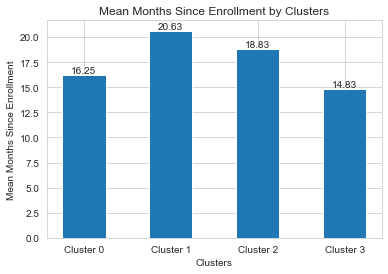

In [77]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_month_means = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_month_means.append(group['months_since_enrollment'].mean())

# Set the width of each bar
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the mean months since enrollment for each cluster
plt.bar(bar_positions, cluster_month_means, width=bar_width)

# Add labels to the bars
for i, month_mean in enumerate(cluster_month_means):
    plt.text(i, month_mean, f'{month_mean:.2f}', ha='center', va='bottom')

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Mean Months Since Enrollment')
plt.title('Mean Months Since Enrollment by Clusters')
plt.xticks(bar_positions, cluster_labels)

# Show the plot
plt.show()


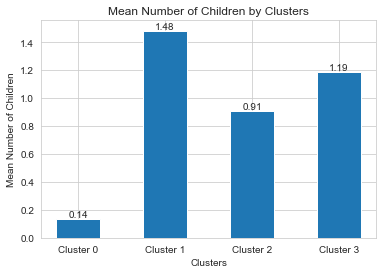

In [78]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_num_children_means = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_num_children_means.append(group['num_children'].mean())

# Set the width of each bar
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the mean number of children for each cluster
plt.bar(bar_positions, cluster_num_children_means, width=bar_width)

# Add labels to the bars
for i, num_children_mean in enumerate(cluster_num_children_means):
    plt.text(i, num_children_mean, f'{num_children_mean:.2f}', ha='center', va='bottom')

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Mean Number of Children')
plt.title('Mean Number of Children by Clusters')
plt.xticks(bar_positions, cluster_labels)

# Show the plot
plt.show()


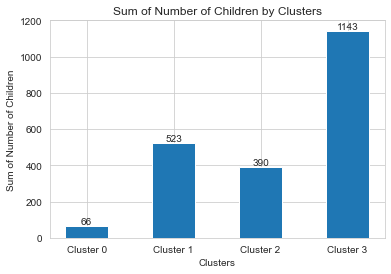

In [79]:
# Group the dataframe by clusters
grouped_df = Marketing_df.groupby('Clusters')

# Prepare data for plotting
cluster_labels = []
cluster_num_children_sums = []

# Iterate over each cluster
for cluster_label, group in grouped_df:
    cluster_labels.append(f'Cluster {cluster_label}')
    cluster_num_children_sums.append(group['num_children'].sum())

# Set the width of each bar
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(cluster_labels))

# Plot the sum of number of children for each cluster
plt.bar(bar_positions, cluster_num_children_sums, width=bar_width)

# Add labels to the bars
for i, num_children_sum in enumerate(cluster_num_children_sums):
    plt.text(i, num_children_sum, str(num_children_sum), ha='center', va='bottom')

# Customize the x-axis labels and ticks
plt.xlabel('Clusters')
plt.ylabel('Sum of Number of Children')
plt.title('Sum of Number of Children by Clusters')
plt.xticks(bar_positions, cluster_labels)

# Show the plot
plt.show()


In [80]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_df.groupby('Clusters')['num_children'].mean().round(2)

# Display the mean values for each cluster as a DataFrame
cluster_means

Clusters
0    0.14
1    1.48
2    0.91
3    1.19
Name: num_children, dtype: float64

In [81]:
# Add cluster labels to Marketing_df
Marketing_df['Clusters'] = labels

# Group the columns by the clusters and calculate the mean
cluster_means = Marketing_df.groupby('Clusters')['num_children'].sum()

# Display the mean values for each cluster as a DataFrame
cluster_means

Clusters
0      66
1     523
2     390
3    1143
Name: num_children, dtype: int64